# **PLOT QUALITY AND MUTATION TARGET ANALYSIS**


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import json

import matplotlib.colors as mcolors

%matplotlib inline


# Data loading
Since the data are divided into subfolders according to quality, as the first operation, unique files containing all target data contained in each subfolder are created.  
To create these files, we will iterate through each subfolder and concatenate the data.

In [13]:
def load_and_concat(folder_path):

    dataframes = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):  
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [14]:
#wild type files
wild_type_1 = '/home/federica/LAB2/data_202409181630_allDB/wild_type/wild_type_1'
wild_type_2 = '/home/federica/LAB2/data_202409181630_allDB/wild_type/wild_type_2'
wild_type_3 = '/home/federica/LAB2/data_202409181630_allDB/wild_type/wild_type_3'

#mutantion target files
mutation_target_1 = '/home/federica/LAB2/data_202409181630_allDB/mutation_target/mutation_target_1'
mutation_target_2 = '/home/federica/LAB2/data_202409181630_allDB/mutation_target/mutation_target_2'
mutation_target_3 = '/home/federica/LAB2/data_202409181630_allDB/mutation_target/mutation_target_3'

#mixed files
mixed_1 = '/home/federica/LAB2/data_202409181630_allDB/mixed/mixed_1'
mixed_2 = '/home/federica/LAB2/data_202409181630_allDB/mixed/mixed_2'
mixed_3 = '/home/federica/LAB2/data_202409181630_allDB/mixed/mixed_3'

In [15]:
wild_type_1 = load_and_concat(wild_type_1)
wild_type_2 = load_and_concat(wild_type_2)
wild_type_3 = load_and_concat(wild_type_3)

mutation_target_1 = load_and_concat(mutation_target_1)
mutation_target_2 = load_and_concat(mutation_target_2)
mutation_target_3 = load_and_concat(mutation_target_3)

mixed_1 = load_and_concat(mixed_1)
mixed_2 = load_and_concat(mixed_2)
mixed_3 = load_and_concat(mixed_3)

**Count the number of targets for each quality in each category**

In [16]:
def count_targets_by_quality(data, quality_label):
    num_targets = data['Target ChEMBL ID'].nunique()
    avg_points_per_target = data.groupby('Target ChEMBL ID').size().mean()
    min_points_per_target = data.groupby('Target ChEMBL ID').size().min()
    max_points_per_target = data.groupby('Target ChEMBL ID').size().max()
    total_points = data.shape[0]
    max_target = data['Target ChEMBL ID'].value_counts().idxmax()
    
    dict_data = {
        "num_targets": num_targets,
        "avg_points_per_target": avg_points_per_target,
        "min_points_per_target": min_points_per_target,
        "max_points_per_target": max_points_per_target,
        "total_points": total_points,
        "max_target": str(max_target),  # Convert to string
        "quality_label": quality_label  # Convert to string
    }
    
    return dict_data

In [17]:
count_wild_type_1 = count_targets_by_quality(wild_type_1, "wild_type_1")
count_wild_type_2 = count_targets_by_quality(wild_type_2, "wild_type_2")
count_wild_type_3 = count_targets_by_quality(wild_type_3, "wild_type_3")

count_mutation_target_1 = count_targets_by_quality(mutation_target_1, "mutation_target_1")
count_mutation_target_2 = count_targets_by_quality(mutation_target_2, "mutation_target_2")
count_mutation_target_3 = count_targets_by_quality(mutation_target_3, "mutation_target_3")

count_mixed_1 = count_targets_by_quality(mixed_1, "mixed_1")
count_mixed_2 = count_targets_by_quality(mixed_2, "mixed_2")
count_mixed_3 = count_targets_by_quality(mixed_3, "mixed_3")


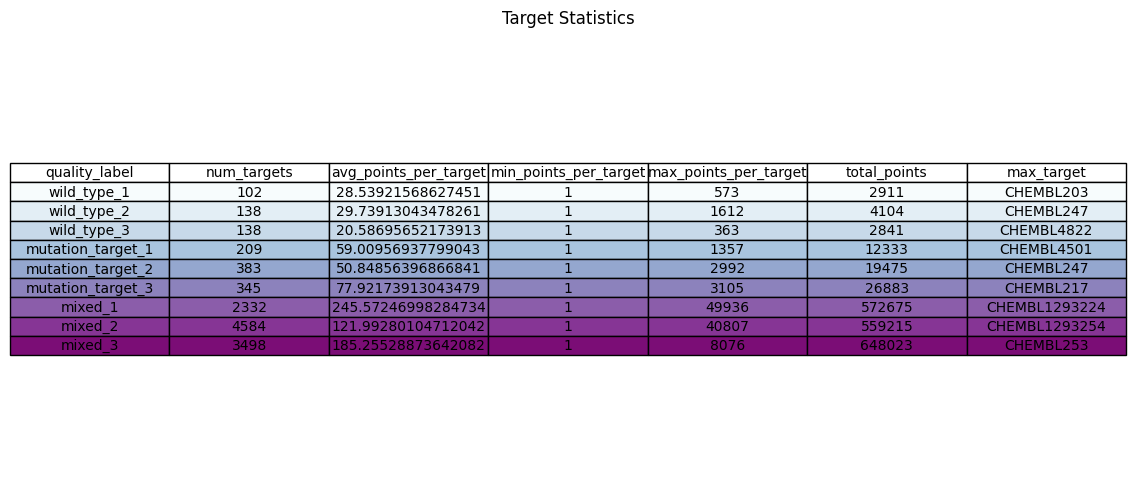

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def compute_statistics(data, quality_label):
    num_targets = data['Target ChEMBL ID'].nunique()
    avg_points_per_target = data.groupby('Target ChEMBL ID').size().mean()
    min_points_per_target = data.groupby('Target ChEMBL ID').size().min()
    max_points_per_target = data.groupby('Target ChEMBL ID').size().max()
    total_points = data.shape[0]
    max_target = data['Target ChEMBL ID'].value_counts().idxmax()
    
    return {
        "quality_label": quality_label,
        "num_targets": num_targets,
        "avg_points_per_target": avg_points_per_target,
        "min_points_per_target": min_points_per_target,
        "max_points_per_target": max_points_per_target,
        "total_points": total_points,
        "max_target": max_target
    }

# Compute statistics for each dataset
statistics = [
    compute_statistics(wild_type_1, "wild_type_1"),
    compute_statistics(wild_type_2, "wild_type_2"),
    compute_statistics(wild_type_3, "wild_type_3"),
    compute_statistics(mutation_target_1, "mutation_target_1"),
    compute_statistics(mutation_target_2, "mutation_target_2"),
    compute_statistics(mutation_target_3, "mutation_target_3"),
    compute_statistics(mixed_1, "mixed_1"),
    compute_statistics(mixed_2, "mixed_2"),
    compute_statistics(mixed_3, "mixed_3")
]

# Convert the list of dictionaries to a DataFrame
df_statistics = pd.DataFrame(statistics)

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(12, 6))  # Set the figure size
ax.axis('tight')
ax.axis('off')

# Create a uniform blue color for all cells
blue_color = plt.cm.Blues(0.3)  # Adjust the shade of blue as needed
cell_colours = [[blue_color for _ in range(len(df_statistics.columns))] for _ in range(len(df_statistics))]

# Create the table with uniform blue color
table = ax.table(cellText=df_statistics.values, colLabels=df_statistics.columns, cellLoc='center', loc='center', cellColours=cell_colours)

# Set the font size for the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Adjust the layout to reduce space between title and table
plt.subplots_adjust(top=0.85)
plt.title('Target Statistics', pad=10)
plt.show()

**Point distribution by Target**

In [7]:

def plot_points_per_target(data, quality_label, top_n=None):
    target_group = data.groupby('Target ChEMBL ID').size().reset_index(name='count')
    
    if top_n is not None:
        target_group = target_group.nlargest(top_n, 'count')
    
    fig = px.bar(target_group, x='Target ChEMBL ID', y='count', 
                 title=f"Number of points per target ({quality_label})",
                 labels={'Target ChEMBL ID': 'Target', 'count': 'Number of points'},
                 hover_data={'Target ChEMBL ID': True, 'count': True})
    
    fig.update_layout(xaxis_title='Target', yaxis_title='Number of points')
    fig.update_xaxes(showticklabels=False)
    
    fig.show()

In [8]:
plot_points_per_target(wild_type_1, "wild_type_1")
#plot_points_per_target(wild_type_2, "wild_type_2")
#plot_points_per_target(wild_type_3, "wild_type_3")

#plot_points_per_target(mutation_target_1, "mutation_target_1")
#plot_points_per_target(mutation_target_2, "mutation_target_2")
#plot_points_per_target(mutation_target_3, "mutation_target_3")

#plot_points_per_target(mixed_1, "mixed_1")
#plot_points_per_target(mixed_2, "mixed_2")
#plot_points_per_target(mixed_3, "mixed_3")

# Focus on target of interest: HDAC6, HSP90, EGFR

In [9]:
def plot_target_of_interest(data, target_list, quality_label):
    plt.figure(figsize=(12, 6))
    
    target_group = data.groupby('Target ChEMBL ID').size().reset_index(name='count')
    sns.barplot(x='Target ChEMBL ID', y='count', data=target_group, hue='Target ChEMBL ID', palette='coolwarm', legend=False)
    
    for target in target_list:
        target_value = target_group[target_group['Target ChEMBL ID'] == target]
        if not target_value.empty:
            plt.text(target_value['Target ChEMBL ID'].values[0],
                     target_value['count'].values[0] + 0.5,
                     f'{target}', color='black', weight='bold', fontsize=12)
        else:
            print(f"Warning: Target {target} not found in the data.")
    
    plt.xlabel('Target')
    plt.xticks([])
    plt.grid(False)
    plt.title(f'Targets of Interest for {quality_label}')
    plt.show()

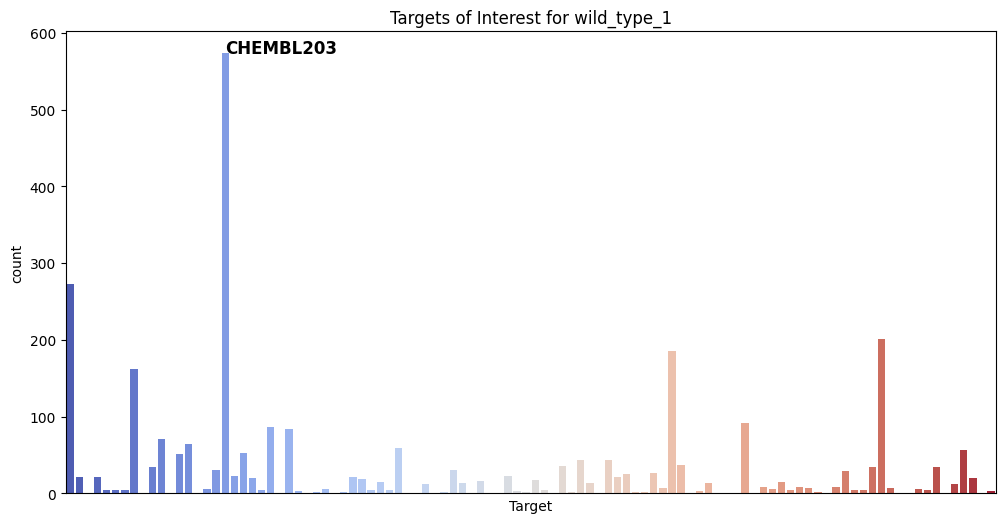

In [10]:
plot_target_of_interest(wild_type_1, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "wild_type_1")
#plot_target_of_interest(wild_type_2, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "wild_type_2", count_wild_type_2)
#plot_target_of_interest(wild_type_3, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "wild_type_3", count_wild_type_3)

#plot_target_of_interest(mutation_target_1, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "mutation_target_1", count_mutation_target_1)
#plot_target_of_interest(mutation_target_2, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "mutation_target_2", count_mutation_target_2)
#plot_target_of_interest(mutation_target_3, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "mutation_target_3", count_mutation_target_3)

#plot_target_of_interest(mixed_1, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "mixed_1", count_mixed_1)
#plot_target_of_interest(mixed_2, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "mixed_2", count_mixed_2)
#plot_target_of_interest(mixed_3, ['CHEMBL240', 'CHEMBL203', 'CHEMBL218'], "mixed_3", count_mixed_3)

In [11]:
def plot_heatmap(data, quality_label):
    # Pivot the data to create a matrix suitable for heatmap
    heatmap_data = pd.crosstab(data['Target ChEMBL ID'], quality_label)
    
    # Set the figure size
    plt.figure(figsize=(12, 8))
    
    # Create the heatmap without annotations
    sns.heatmap(heatmap_data, annot=False, cmap='coolwarm')
    
    # Set the title and labels
    plt.title(f'Heatmap of Target ChEMBL ID of {quality_label}')
    plt.ylabel('Target ChEMBL ID')
    plt.xlabel('')
    
    # Show the plot
    plt.show()


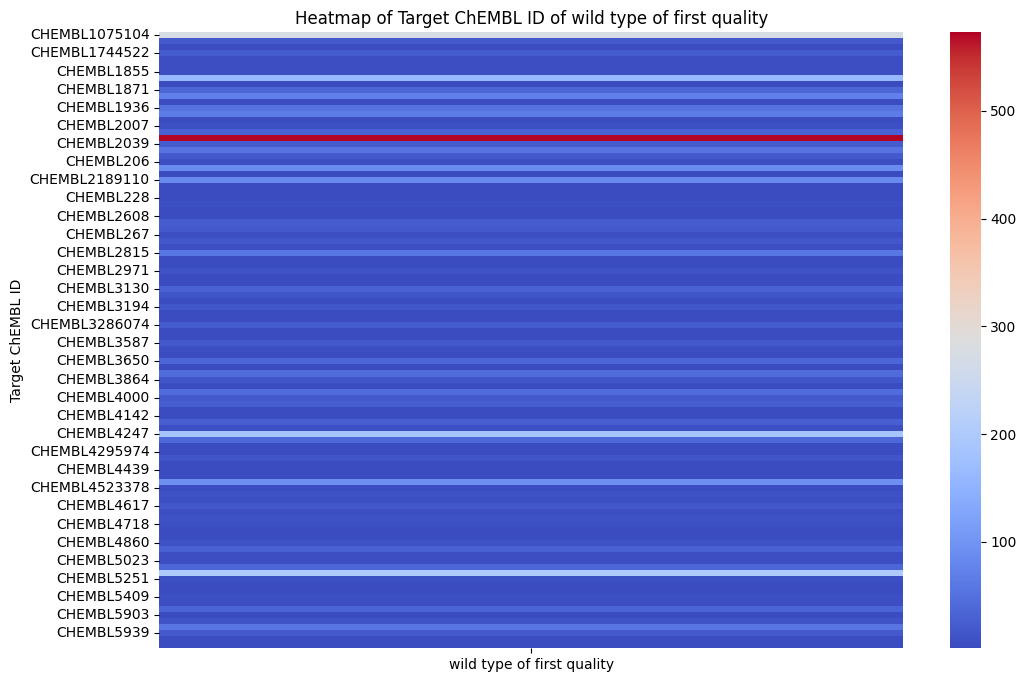

In [12]:
plot_heatmap(wild_type_1, 'wild type of first quality')